**Assignment: Algerian Forest Fire Data Analysis using Multiple Linear Regression**

Objective: The objective of this assignment is to analyze the FWI in the Algerian forest fire dataset using multiple linear regression, evaluate the model's performance, create pickle files, and test the model on unseen data.


## **01. DATA PREPARATION**

**a.  Load the dataset and understand the dataframe**

In [293]:
#1. Import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [294]:
# 2. Load the dataset

df_init = pd.read_csv ('/content/Algerian_forest_fires_cleaned.csv')


In [295]:
#3. Display the first 5 rows of the DataFrame
df_init.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [296]:
# 4. Print information about the DataFrame
df_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [297]:
# 5. Get the number of rows and columns  and display
num_rows, num_columns = df_init.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 243
Number of columns: 15


In [298]:
# 6. Get descriptive analysis
df_init.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


**b. Data Cleaning**

In [299]:
#1. check for missing values
df_init.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [300]:
#2. Removecheck for  duplicates
df_init.duplicated().sum()

0

In [301]:
#dropping out the date, and classes for they are irrelevant for this prediction

df_1= df_init.drop(columns=['day', 'month', 'year', 'Classes'], axis =1)
df_1.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0


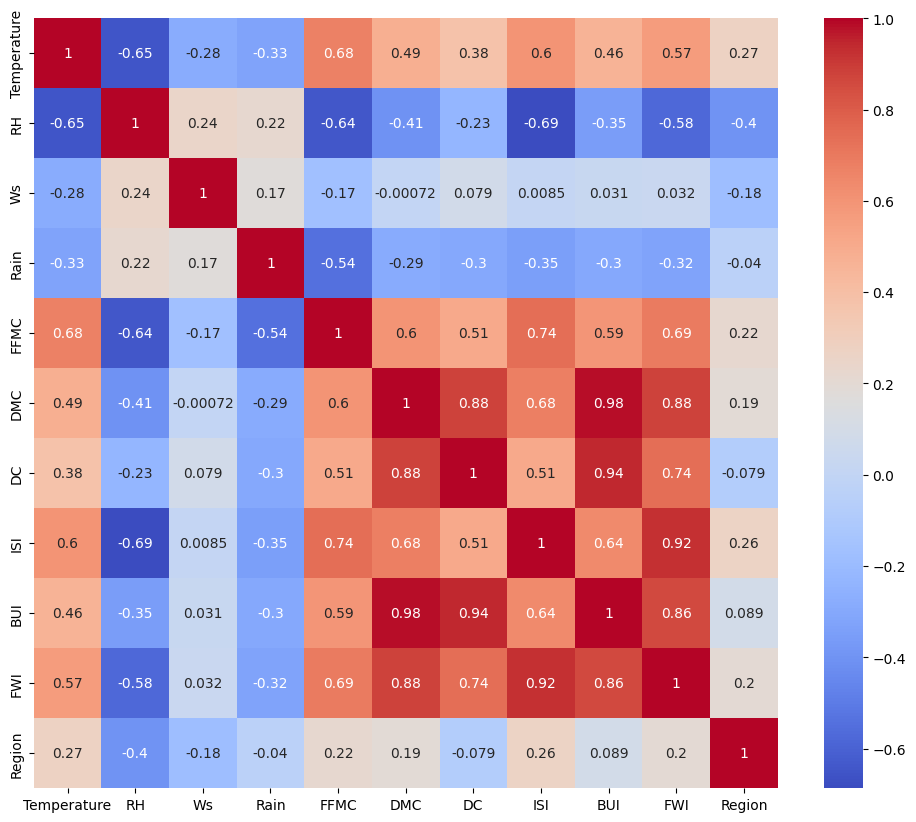

In [302]:
#3.Create heatmap to find co-realtion
plt.figure(figsize=(12, 10))
sns.heatmap(df_1.corr(),cmap = "coolwarm", annot= True)
plt.show()

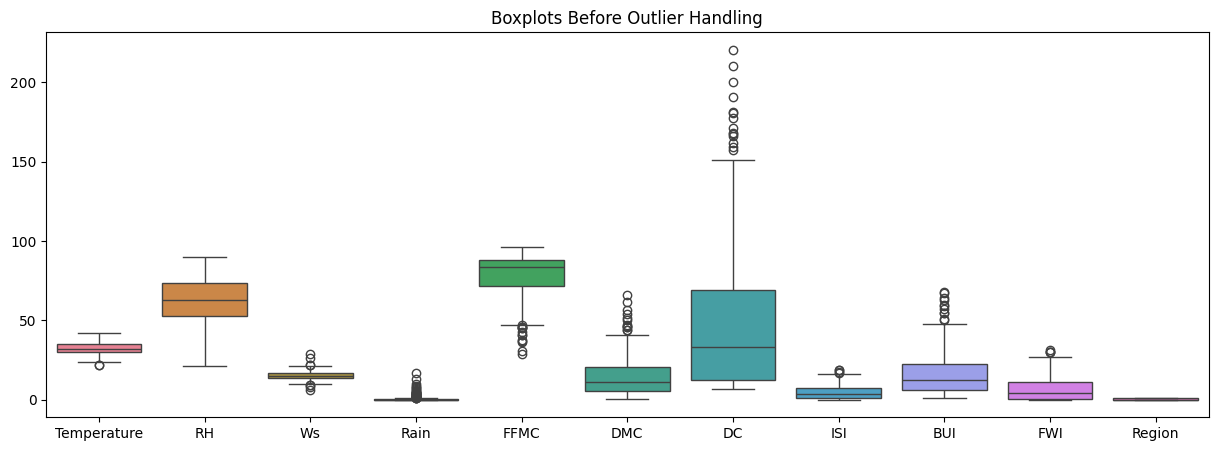

In [303]:
#4. Check outliers - create box plots
plt.figure(figsize=(15, 5))
sns.boxplot(data=df_1)
plt.title('Boxplots Before Outlier Handling')
plt.show()


In [304]:
#5. Outlier Handling using IQR
import pandas as pd

# Assuming df is your DataFrame
df = df_1.copy()

# Define the function to remove outliers using IQR
def remove_outliers_iqr(df):
    q1 = np.percentile(df, 25)
    q3 = np.percentile(df, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    cleaned_data = df[(df >= lower_bound) & (df <= upper_bound)]
    return cleaned_data

# Remove outliers using IQR
df_cleaned_data_remove_outliers = remove_outliers_iqr(df)

print("Original data:", df)
print("Cleaned data using IQR method:", df_cleaned_data_remove_outliers)


Original data:      Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  FWI  Region
0             29  57  18   0.0  65.7   3.4   7.6  1.3   3.4  0.5       0
1             29  61  13   1.3  64.4   4.1   7.6  1.0   3.9  0.4       0
2             26  82  22  13.1  47.1   2.5   7.1  0.3   2.7  0.1       0
3             25  89  13   2.5  28.6   1.3   6.9  0.0   1.7  0.0       0
4             27  77  16   0.0  64.8   3.0  14.2  1.2   3.9  0.5       0
..           ...  ..  ..   ...   ...   ...   ...  ...   ...  ...     ...
238           30  65  14   0.0  85.4  16.0  44.5  4.5  16.9  6.5       1
239           28  87  15   4.4  41.1   6.5   8.0  0.1   6.2  0.0       1
240           27  87  29   0.5  45.9   3.5   7.9  0.4   3.4  0.2       1
241           24  54  18   0.1  79.7   4.3  15.2  1.7   5.1  0.7       1
242           24  64  15   0.2  67.3   3.8  16.5  1.2   4.8  0.5       1

[243 rows x 11 columns]
Cleaned data using IQR method:      Temperature    RH  Ws  Rain  FFMC   DMC    DC  I

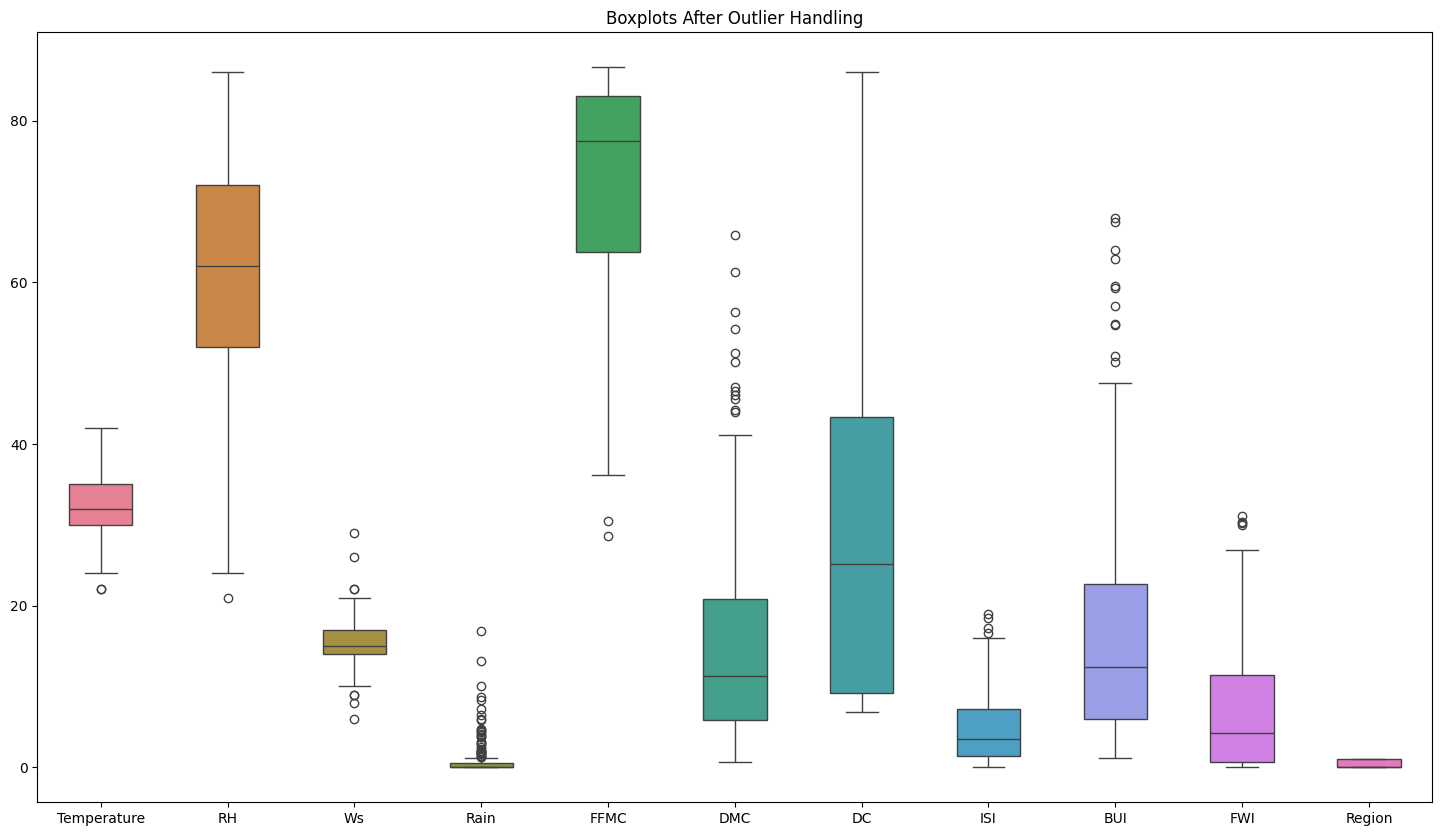

In [305]:
# EDA - Boxplots after outlier handling
plt.figure(figsize=(18, 10))
sns.boxplot(data=df_cleaned_data_remove_outliers, width=0.5)
plt.title('Boxplots After Outlier Handling')
plt.show()

In [306]:
#6. NaN values replaced with the median of each column after removing outliers

df_cleaned = df_cleaned_data_remove_outliers.fillna(df_1.median())
df_cleaned


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,29,57.0,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,29,61.0,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,26,82.0,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,25,63.0,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,27,77.0,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65.0,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1
239,28,63.0,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1
240,27,63.0,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1
241,24,54.0,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1


In [307]:
# Remove five records for further usage as unseen data and Removing the unseen records from the dataset
unseen_records = df_cleaned.sample(5, random_state=42)
df_model = df_cleaned.drop(unseen_records.index)

**c. Split the data into a training set and a test set**

In [308]:
#1. Define variables

X = df_model[['BUI', 'ISI', 'DC', 'DMC', 'FFMC', 'Rain', 'RH', 'Temperature']] #independent variable
y = df_model['FWI'] # dependent variable

In [309]:
 #2. Split the data into a training set and a test set (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [310]:
#3. Standarization of data
scaler = StandardScaler()
# scaling for independent variables
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

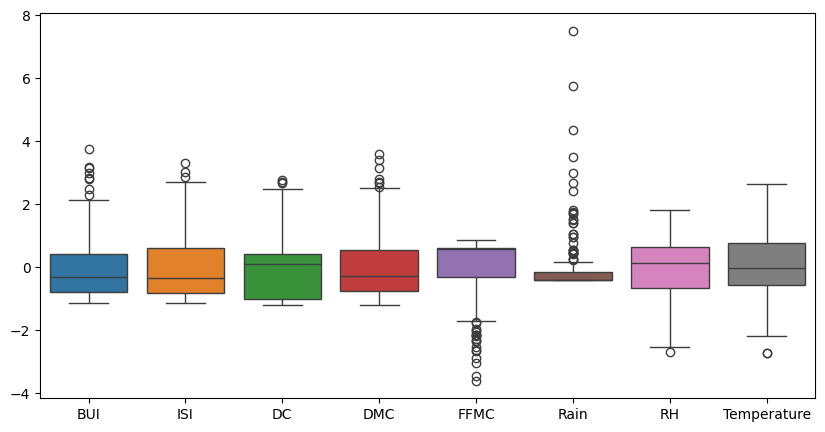

In [311]:
#4. with scaling
# Convert scaled data back to DataFrame with column names
X_train_sc_df = pd.DataFrame(X_train_sc, columns=X.columns)

# Boxplot with scaled data
plt.figure(figsize=(10, 5))
sns.boxplot(data=X_train_sc_df)
plt.show()


# **2.	Model Training**

**a. Use multiple linear regression to model the relationship between the independent variables (temperature, humidity, wind speed) and the dependent variable (fire intensity).- as given in the exercise**

In [312]:
# 1. Create and fit the multiple linear regression model to the training set
mlr_model = LinearRegression()
mlr_model.fit(X_train_sc, y_train)

LinearRegression()

In [313]:
#2. Find coefficient and intercept
mlr_model.coef_, mlr_model.intercept_

(array([ 3.03090365,  5.55487413, -0.22190989,  0.14979946, -0.7346345 ,
        -0.02453871,  0.06571227, -0.04481509]),
 7.0200000000000005)

In [314]:
# 3. Make predictions on the test set
y_pred = mlr_model.predict(X_test_sc)

## **3.	Model Evaluation**

**a. Evaluate the trained multiple linear regression model's performance on the test dataset.**

In [315]:
# 4. Evaluate the model performance
# Import necessary libraries
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluate the Multiple Linear Regression model
mse_mlr = mean_squared_error(y_test, y_pred)
mae_mlr = mean_absolute_error(y_test, y_pred)
r2_mlr = r2_score(y_test, y_pred)

**b.Calculate appropriate evaluation metrics**

In [316]:
#Calculate appropriate evaluation metrics such as mean squared error (MSE), mean absolute error (MAE), R-squared

print("Multiple Linear Regression:")
print(f'Mean Squared Error: {mse_mlr}')
print(f'Mean Absolute Error: {mae_mlr}')
print(f'R-squared: {r2_mlr}')

Multiple Linear Regression:
Mean Squared Error: 5.005109539154763
Mean Absolute Error: 0.7827251753526955
R-squared: 0.912394677983976


# ***2.c. Tune hyperparameters to improve the model's performance.***


**1. use ridge regularization**

In [317]:
#3. Define the hyperparameter grid for Ridge regression
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create Ridge regression model
ridge_model = Ridge()

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_sc, y_train)  # Use scaled features

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']

# Fit the Ridge model with the best hyperparameters to the scaled training data
tuned_model = Ridge(alpha=best_alpha)
tuned_model.fit(X_train_sc, y_train)  # Use scaled features

Ridge(alpha=0.1)

In [318]:
# Evaluate the Tuned Ridge Regression model and calculate metrices
y_pred_ridge = tuned_model.predict(X_test_sc)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print("\nTuned Ridge Regression:")
print(f'Mean Squared Error: {mse_ridge}')
print(f'Mean Absolute Error: {mae_ridge}')
print(f'R-squared: {r2_ridge}')


Tuned Ridge Regression:
Mean Squared Error: 4.9882288430244826
Mean Absolute Error: 0.7819949542704238
R-squared: 0.912690143809205


**2. Use lasso regularization**

In [319]:
from sklearn.model_selection import GridSearchCV

# Define a range of alpha values to search
alphas = [0.001, 0.01, 0.1, 1, 10, 100]

# Create a parameter grid
param_grid = {'alpha': alphas}

# Create a Lasso model
lasso_model = Lasso()

# Create the GridSearchCV object
grid_search = GridSearchCV(lasso_model, param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the grid search to the data
grid_search.fit(X_train_sc, y_train)

# Get the best alpha value from the grid search
best_alpha = grid_search.best_params_['alpha']

# Use the best alpha to train the final Lasso model
final_lasso_model = Lasso(alpha=best_alpha)
final_lasso_model.fit(X_train_sc, y_train)



Lasso(alpha=0.01)

In [320]:
# Make predictions on the test set
y_pred_final_lasso = final_lasso_model.predict(X_test_sc)

# Evaluate the final Lasso Regression model
mse_final_lasso = mean_squared_error(y_test, y_pred_final_lasso)
mae_final_lasso = mean_absolute_error(y_test, y_pred_final_lasso)
r2_final_lasso = r2_score(y_test, y_pred_final_lasso)

# Print the results
print("Final Lasso Regression:")
print(f'Best Alpha: {best_alpha}')
print(f'Mean Squared Error: {mse_final_lasso}')
print(f'Mean Absolute Error: {mae_final_lasso}')
print(f'R-squared: {r2_final_lasso}')

Final Lasso Regression:
Best Alpha: 0.01
Mean Squared Error: 4.959135622015052
Mean Absolute Error: 0.787828394477712
R-squared: 0.9131993676283994


**3.Use elastic Net**

In [321]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# Define a range of alpha values to search
alphas = [0.001, 0.01, 0.1, 1, 10, 100]

# Define a range of l1_ratio values to search
l1_ratios = [0.1, 0.3, 0.5, 0.7, 0.9]

# Create a parameter grid
param_grid = {'alpha': alphas, 'l1_ratio': l1_ratios}

# Create an Elastic Net model
elastic_net_model = ElasticNet()

# Create the GridSearchCV object
grid_search = GridSearchCV(elastic_net_model, param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the grid search to the data
grid_search.fit(X_train_sc, y_train)

# Get the best alpha and l1_ratio values from the grid search
best_alpha = grid_search.best_params_['alpha']
best_l1_ratio = grid_search.best_params_['l1_ratio']

# Use the best alpha and l1_ratio to train the final Elastic Net model
final_elastic_net_model = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio)
final_elastic_net_model.fit(X_train_sc, y_train)



ElasticNet(alpha=0.01, l1_ratio=0.9)

In [322]:

# Make predictions on the test set
y_pred_final_elastic_net = final_elastic_net_model.predict(X_test_sc)

# Evaluate the final Elastic Net model
mse_final_elastic_net = mean_squared_error(y_test, y_pred_final_elastic_net)
mae_final_elastic_net = mean_absolute_error(y_test, y_pred_final_elastic_net)
r2_final_elastic_net = r2_score(y_test, y_pred_final_elastic_net)

# Print the results
print("Final Elastic Net Regression:")
print(f'Best Alpha: {best_alpha}')
print(f'Best L1 Ratio: {best_l1_ratio}')
print(f'Mean Squared Error: {mse_final_elastic_net}')
print(f'Mean Absolute Error: {mae_final_elastic_net}')
print(f'R-squared: {r2_final_elastic_net}')

Final Elastic Net Regression:
Best Alpha: 0.01
Best L1 Ratio: 0.9
Mean Squared Error: 4.931940697963304
Mean Absolute Error: 0.7859492774615466
R-squared: 0.9136753652184855


**C. Interpreting the results and assessing how well the models predict fire intensity:**

**Multiple Linear Regression:**
MSE: 5.01, MAE: 0.78, R-squared: 0.9123
The model performs exceptionally well, explaining around 91% of the variability in fire intensity.

**Tuned Ridge Regression:**
MSE: 4.99, MAE: 0.78, R-squared: 0.9126
Similar performance to Multiple Linear Regression, maintaining a high R-squared value.

**Final Lasso Regression:**
Best Alpha: 0.01, MSE: 4.96, MAE: 0.79, R-squared: 0.9131
Lasso Regression offers slightly improved MSE and MAE, maintaining a high R-squared.

**Final Elastic Net Regression:**
Best Alpha: 0.01, Best L1 Ratio: 0.9
MSE: 4.93, MAE: 0.79, R-squared: 0.9136
Elastic Net performs similarly to Lasso, indicating consistent high-quality predictions.
Interpretation and Assessment:

All models demonstrate exceptional predictive performance with **R-squared values around 91%**, signifying strong explanatory power.
Low MSE and MAE indicate accurate predictions with minimal errors.
The models effectively capture the relationship between independent variables (temperature, humidity, wind speed) and fire intensity.

**These metrics indicate a highly accurate and well-fitting model. The R-squared value of 0.9136 suggests that approximately 91% of the variability in the FWI can be explained by this Elastic Net Regression model.**

# **4. Pickling the file**

**a. Save the Model and Scaler as a Pickle File**

In [323]:
import pickle
pickle.dump(final_elastic_net_model, open('mlr_assignment.pkl','wb'))
pickle.dump(scaler, open('scaler_assignment.pkl','wb'))

**b. Purpose of Pickling and benifits**
Pickling the model involves serializing it into a binary file. This is done to save the trained model's state, including parameters and coefficients.
Storage: Pickling is like putting your trained model and data scaler in a sealed container for later use, saving time and resources.
Consistency: It ensures it applies the same data transformations it learned during training.
Portability: Easy to move and share model, making it handy for deployment.
Integration: Compatible with various systems for easy use in applications.

# **5.	Prediction on Unseen Data**

**a. Load the pickled multiple linear regression model**

In [324]:
import pandas as pd
import pickle

In [325]:
# Load the pickled model and scaler
loaded_model = pickle.load(open('mlr_assignment.pkl', 'rb'))
loaded_scaler = pickle.load(open('scaler_assignment.pkl', 'rb'))

In [326]:
unseen_records

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
24,31,64.0,15,0.0,83.3,14.2,63.8,5.7,18.3,8.4,0
6,33,54.0,13,0.0,83.3,9.9,30.5,6.4,10.9,7.2,0
152,28,58.0,18,2.2,63.7,3.2,8.5,1.2,3.3,0.5,1
232,34,58.0,13,0.2,79.5,18.7,33.1,2.1,24.4,3.8,1
238,30,65.0,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1


In [327]:
# Assuming unseen_data contains the unseen records
X_unseen = unseen_records[['BUI', 'ISI', 'DC', 'DMC', 'FFMC', 'Rain', 'RH', 'Temperature']]   # Assuming 'FireIntensity' is the target variable
y_unseen = unseen_records['FWI']

**b. Preprocess the unseen data using the same transformations applied to the training data.**

In [328]:
# Preprocess the unseen data using the same transformations applied to the training data
X_unseen_scaled = loaded_scaler.transform(X_unseen)

In [329]:
# Use the loaded model to predict the fire intensity on the unseen data
y_pred_unseen = loaded_model.predict(X_unseen_scaled)
print("predicted_FWI_value =", y_pred_unseen)

predicted_FWI_value = [7.98010462 7.49989021 0.16418163 5.09065142 6.20561611]


**c. Use the loaded model to predict the fire intensity on the unseen data.**

In [330]:
# Evaluate the model's performance on the unseen data using the same metrics
mse_unseen = mean_squared_error(y_unseen, y_pred_unseen)
mae_unseen = mean_absolute_error(y_unseen, y_pred_unseen)
r2_unseen = r2_score(y_unseen, y_pred_unseen)

# Print the evaluation metrics
print("Model Evaluation on Unseen Data:")
print(f'Mean Squared Error: {mse_unseen}')
print(f'Mean Absolute Error: {mae_unseen}')
print(f'R-squared: {r2_unseen}')

Model Evaluation on Unseen Data:
Mean Squared Error: 0.4262926426557641
Mean Absolute Error: 0.5281278549837918
R-squared: 0.9466440569420541
